In [ ]:
#Importamos las librerias necesarias para abrir el archivo csv

import pandas as pd
import numpy as np

df_movies = pd.read_csv('movies_dataset.csv', sep = ',')
df_movies.head()

C:\Users\jhnnc\AppData\Local\Temp\ipykernel_15900\1886751633.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies = pd.read_csv('D:\HENRY REPO\Proyecto Individual\Movies-20241022T010521Z-001\Movies\movies_dataset.csv', sep = ',')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## ETL

In [67]:
df_movies.shape # dimensiones del dataset

(45466, 24)

(Punto 6 de henry) Eliminar las columnas que no serán utilizadas, video, imdb_id, adult, original_title, poster_path y homepage.

También eliminares columnas como production_companies, production_countries, runtime, tagline y spoken_languages como parte de la reducción por cuestiones de limitación de recursos para Render, ademas estas columnas no aportaran información relevante mas allá de las que ya tenemos.

In [68]:
df_movies.drop(
    labels=['video', 'imdb_id', 'adult', 'original_title', 'poster_path', 'homepage', 'production_companies', 'production_countries', 'runtime', 'tagline', 'spoken_languages'], 
    axis = 1, 
    inplace=True
    )

In [69]:
# Observamos los tipos de datos de cada columna
df_movies.dtypes

belongs_to_collection     object
budget                    object
genres                    object
id                        object
original_language         object
overview                  object
popularity                object
release_date              object
revenue                  float64
status                    object
title                     object
vote_average             float64
vote_count               float64
dtype: object

Las columnas budget, popularity, id y revenue que originalmente son de tipo 'object' las transformaremos al tipo numerico ya que son numeros pero pero se encuentran en string

In [70]:
df_movies['budget'] = df_movies['budget'].apply(pd.to_numeric,errors='coerce')
df_movies['popularity'] = df_movies['popularity'].apply(pd.to_numeric,errors='coerce')
df_movies['revenue'] = df_movies['revenue'].apply(pd.to_numeric,errors='coerce')
df_movies['id'] = df_movies['id'].apply(pd.to_numeric,errors='coerce')

In [71]:
df_movies.dtypes

belongs_to_collection     object
budget                   float64
genres                    object
id                       float64
original_language         object
overview                  object
popularity               float64
release_date              object
revenue                  float64
status                    object
title                     object
vote_average             float64
vote_count               float64
dtype: object

In [72]:
df_movies.describe()

,budget,id,popularity,revenue,vote_average,vote_count
count,4.546300e+04,45463.000000,45460.000000,4.546000e+04,45460.000000,45460.000000
mean,4.224579e+06,108359.918813,2.921478,1.120935e+07,5.618207,109.897338
std,1.742413e+07,112460.749278,6.005414,6.433225e+07,1.924216,491.310374
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,26449.500000,0.385948,0.000000e+00,5.000000,3.000000
50%,0.000000e+00,60003.000000,1.127685,0.000000e+00,6.000000,10.000000
75%,0.000000e+00,157328.000000,3.678902,0.000000e+00,6.800000,34.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,10.000000,14075.000000


(Punto 1 de henry) Algunos campos, como belongs_to_collection, production_companies y otros (ver diccionario de datos) están anidados, esto es o bien tienen un diccionario o una lista como valores en cada fila, ¡deberán desanidarlos para poder y unirlos al dataset de nuevo hacer alguna de las consultas de la API! O bien buscar la manera de acceder a esos datos sin desanidarlos.


Desanadiremos las columnas belongs_to_collection y genres, solo extraeremos los valores de nombres de la coleccion y nombres de los generos, estos valores estaran separados solo por espacioes en blanco y reemplazaran a las originales

In [73]:
import json

In [74]:
# desanidaremos la columna belongs_to_collection

def desanidar_collection(fila):

    try:
        string = fila.replace("'", '"') # reemplazamos comillas simples por dobles de la cadena
        dict_collection = json.loads(string) # obtenemos el diccionario de la cadena
        coleccion = dict_collection['name'] # obtenemos el valor de la clave name
        return coleccion
    except:
        
        return np.nan # Si el campo esta vacio entonces devolvemos NaN

df_movies['belongs_to_collection']=df_movies['belongs_to_collection'].apply(desanidar_collection) #aplicamos la funcion a cada fila

In [75]:
# desanidaremos la columna genres

def desanidar_genres(fila):

    
    string = fila.replace("'", '"') # reemplazamos comillas simples por dobles de la cadena
    dict_collection = json.loads(string) # obtenemos el diccionario de la cadena
    lista = [i['name'] for i in dict_collection if i['name'] ] # obtenemos el valor de la clave name y la guardamos en una lista
    
    # quitamos las comas que separan a cada elemento de la lista y las reemplazamos por espacios en blanco
    if lista: 

        lista_desanidado = ' '.join(lista)
        
        return lista_desanidado
    else:
        return np.nan # Si el campo esta vacio entonces devolvemos NaN

df_movies['genres']=df_movies['genres'].apply(desanidar_genres) #aplicamos la funcion a cada fila

In [76]:
df_movies.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,release_date,revenue,status,title,vote_average,vote_count
0,Toy Story Collection,30000000.0,Animation Comedy Family,862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,Released,Toy Story,7.7,5415.0
1,NaN,65000000.0,Adventure Fantasy Family,8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,Released,Jumanji,6.9,2413.0
2,Grumpy Old Men Collection,0.0,Romance Comedy,15602.0,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,Released,Grumpier Old Men,6.5,92.0
3,NaN,16000000.0,Comedy Drama Romance,31357.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,Released,Waiting to Exhale,6.1,34.0
4,Father of the Bride Collection,0.0,Comedy,11862.0,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,Released,Father of the Bride Part II,5.7,173.0


(de henry) Los valores nulos de los campos revenue, budget deben ser rellenados por el número 0.

In [77]:
columns = {'revenue':0, 'budget':0} 
df_movies.fillna(columns, inplace=True)

(de henry) Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0.

In [78]:
# iteramos sobre la columna revenue para extraer valores

lista_return = []

for i in range(len(df_movies['revenue'])):
    
    try:
        a=df_movies.loc[i,'revenue'] # extraemos el valor numerico revenue de cada fila
        b=df_movies.loc[i, 'budget'] # extraemos el valor numerico budget de cada fila
        result = a/b # devidimos los valores
        if result == float(result) and b != 0: # evitamos una division por cero
            lista_return.append(result)
        else:
            lista_return.append(0.0) # Si la division es por eso cero 
    except:
        lista_return.append(0.0)# Cualquier otro error matematico 

C:\Users\jhnnc\AppData\Local\Temp\ipykernel_15900\579685176.py:10: RuntimeWarning: invalid value encountered in scalar divide
  result = a/b # devidimos los valores
C:\Users\jhnnc\AppData\Local\Temp\ipykernel_15900\579685176.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  result = a/b # devidimos los valores


Creamos un dataset 'data_return' con la lista lista_return, con la columna llamada return

In [79]:
df_return  = pd.DataFrame(lista_return, columns=['return'])

(de henry) De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de estreno.

In [80]:
from datetime import datetime as dt

In [81]:
# La funcion convierte cada fila de la columna release_date que originalmente es una cadena en formato datetime

list_year = []
def convertir_fecha(fecha):  
    try:
        fecha_t = dt.strptime(fecha, '%Y-%m-%d') # convertimos la cadena en datetime en formato AAAA-mm-dd
        list_year.append(fecha_t.year) # agregamos a la lista list_year
        return fecha_t.date() # retornamos solo el la fecha
    except:
        list_year.append(np.nan) 
        return np.nan # en caso que el campo este vacio o no contenga el formato, returnamos NaN
df_movies['release_date'] = df_movies['release_date'].apply(convertir_fecha) # aplicamos la funcion a cada fila de la columna release_date

Creamos un dataset 'df_year' con la lista list_year, con la columna llamada release_year

In [82]:

df_year = pd.DataFrame(list_year, columns=['release_year'])

Concatenamos los datasets df_return y df_year con df_year

In [83]:
df_movies = pd.concat([df_movies, df_return, df_year], axis=1)
df_movies.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,release_date,revenue,status,title,vote_average,vote_count,return,release_year
0,Toy Story Collection,30000000.0,Animation Comedy Family,862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,Released,Toy Story,7.7,5415.0,12.451801,1995.0
1,NaN,65000000.0,Adventure Fantasy Family,8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,Released,Jumanji,6.9,2413.0,4.043035,1995.0
2,Grumpy Old Men Collection,0.0,Romance Comedy,15602.0,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,Released,Grumpier Old Men,6.5,92.0,0.000000,1995.0
3,NaN,16000000.0,Comedy Drama Romance,31357.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,Released,Waiting to Exhale,6.1,34.0,5.090760,1995.0
4,Father of the Bride Collection,0.0,Comedy,11862.0,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,Released,Father of the Bride Part II,5.7,173.0,0.000000,1995.0


In [84]:
df_movies.shape # dimensiones del dataframe

(45466, 15)

Eliminamos las columnas duplicadas en el dataset df_movies

In [85]:
df_movies.drop_duplicates(inplace=True)

(de henry) Los valores nulos del campo release_date deben eliminarse.

Eliminaremos tambien los NaN de las columnas title, overview, genres. Los campos de todas estas columnas deben tener datos porque el algoritmo de recomendacion las necesitara para su funcionamiento, al mismo tiempo podremos reducir el dataset

In [86]:
df_movies.isnull().sum()

belongs_to_collection    42281
budget                       0
genres                    2442
id                           3
original_language           11
overview                   954
popularity                   6
release_date                90
revenue                      0
status                      87
title                        6
vote_average                 6
vote_count                   6
return                       0
release_year                90
dtype: int64

In [87]:
df_movies.dropna(
    subset=['title', 'release_date', 'overview', 'genres'], 
    inplace=True
    )

Los datos faltantes de la columna belongs_to_collection seran reemplazados por el valor 'only' para indicar cuando una pelicula no tiene coleccion o es pelicula unica

La columna release_year sera convertido de float a int

In [88]:
df_movies['belongs_to_collection'].fillna('standar', inplace=True)
df_movies['release_year']=df_movies['release_year'].astype(int)

Solo nos quedaremos con las peliculas que su estado (status) sean 'Released' o estrenadas, posteriorme eliminares la misma columna (status) porque ya no nos sera util al tener todo de la misma categoria.

Solo nos quedaremos con las peliculas con el lenguaje original en Ingles y Español, como parte de el recorte del dataset.

In [89]:
df_movies.status.unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned'], dtype=object)

In [90]:
df_movies=df_movies[df_movies.status == 'Released'] # nos quedamos solo con las peliculas estrenadas
df_movies=df_movies.query("original_language == 'en' or original_language == 'es'") # solo nos quedaremos con las peliculas en español e ingles
df_movies=df_movies.drop('status', axis=1) # eliminamos la columna status

In [91]:
df_movies.isnull().sum()

belongs_to_collection    0
budget                   0
genres                   0
id                       0
original_language        0
overview                 0
popularity               0
release_date             0
revenue                  0
title                    0
vote_average             0
vote_count               0
return                   0
release_year             0
dtype: int64

### VISUALIZACION DE DATOS

Visualizamos los datos del dataset con la ayuda de una grafica de seaborn

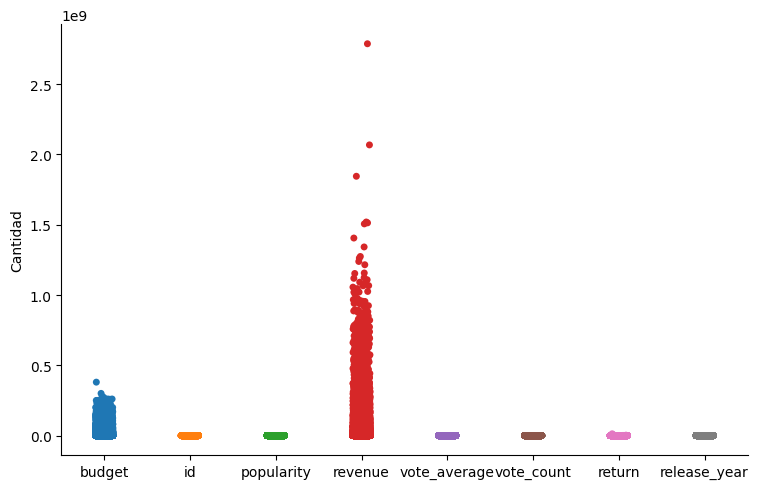

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(df_movies, height=5, aspect=1.5)
plt.ylabel('Cantidad')
plt.show()

Se puede observar que los datos se distribuyen de manera congruente, sin mostrar a la vista valores atipicos a excepcion de la columna revenue, donde existen algunos valores que salen del valor promedio, sin embargo estos valores no parecen ser muy exagerados y se podrian considerar casos reales


### TOMAMOS UNA MUESTRA DEL DATASET

Por razones de rendimiento, tomaremos una muestra de 5000 filas que hayan sido previamente ordenadas de mayor a menor por la cantidad de votos, asegurandonos de esta manera que la muestra sea con las peliculas mas votadas y populares

In [93]:
df_movies=df_movies.sort_values(
                        by='vote_count', 
                        ascending=False
                        ) # ordenamos por la columna vote_count de forma descendente

df_movies=df_movies.iloc[:5000,:] #tomaremos una muestra de 5000 filas

df_movies=df_movies.sample(frac=1) #revolvemos el dataset

df_movies.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,release_date,revenue,title,vote_average,vote_count,return,release_year
11329,The Grudge Collection,20000000.0,Horror Thriller,1975.0,en,"In Tokyo, a young woman is exposed to the same...",6.768804,2006-10-13,39143839.0,The Grudge 2,5.3,288.0,1.957192,2006
1258,standar,6000000.0,History Drama Western Crime,642.0,en,"In late 1890s Wyoming, Butch Cassidy is the af...",6.714577,1969-09-23,102308889.0,Butch Cassidy and the Sundance Kid,7.4,659.0,17.051482,1969
75,standar,20000000.0,Horror Science Fiction,9102.0,en,"(SIRIUS 6B, Year 2078) On a distant mining pla...",12.758848,1995-09-08,5781885.0,Screamers,6.1,154.0,0.289094,1995
15973,Korengal Valley Documentaries,0.0,Documentary War,39312.0,en,Winner of the 2010 Sundance Film Festival Gran...,4.577881,2010-06-25,1422910.0,Restrepo,7.3,117.0,0.000000,2010
19259,The Little Mermaid Collection,0.0,Family Animation,13676.0,en,Follow Ariel's adventures before she gave up h...,0.415606,2008-08-26,0.0,The Little Mermaid: Ariel's Beginning,6.3,187.0,0.000000,2008


### TRATAMIENDO DEL SEGUNDO DATASET 'CREDITS'

In [ ]:
# Leemos el dataset credits

df_credits = pd.read_csv('credits.csv', sep = ',')
df_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [99]:
df_credits.shape # dimensiones del dataset

(45476, 3)

In [100]:
df_credits.isnull().sum() #vemos si hay valores nulos en el dataset

cast    0
crew    0
id      0
dtype: int64

Comensamos a desanidar datos importantes de las columnas cast y crew

Extraeremos solo los nombre de los actores de la columna cast, las guardamos en una lista (list_actors), y todo este conjunto de listas obtenido en las iteraciones sera guardado a su vez en otra lista (list_of_list_actors) y posteriormete le aplicaremos un join a los elementos de la lista list_of_list_actors para obtener una lista donde sus elementos sean separados por comas de tal manera que cuando creemos un dataset solo exista una columna y no varias como si sucede cuando tenemos una lista de listas. Lo mismo se hara con la columna crew.


In [101]:
import ast

list_of_list_actors=[]

for element in df_credits.cast: # iteramos la columna cast
    list_actors=[]

    dict_cast = ast.literal_eval(element) # convertimos la fila (str con presencia de \)a su forma literal
    for key in dict_cast: 
        list_actors.append(key['name']) #guardamos el nombre del actor en la lista list_actors
    
    list_of_list_actors.append(list_actors) # guardamos la lista de actores obtenida en cada iteracion 


list_actors = [", ".join(map(str, sublista)) for sublista in list_of_list_actors] # unimos cada sublista de la lista por ','
print(list_actors[:5])
print(len(list_actors))

['Tom Hanks, Tim Allen, Don Rickles, Jim Varney, Wallace Shawn, John Ratzenberger, Annie Potts, John Morris, Erik von Detten, Laurie Metcalf, R. Lee Ermey, Sarah Freeman, Penn Jillette', 'Robin Williams, Jonathan Hyde, Kirsten Dunst, Bradley Pierce, Bonnie Hunt, Bebe Neuwirth, David Alan Grier, Patricia Clarkson, Adam Hann-Byrd, Laura Bell Bundy, James Handy, Gillian Barber, Brandon Obray, Cyrus Thiedeke, Gary Joseph Thorup, Leonard Zola, Lloyd Berry, Malcolm Stewart, Annabel Kershaw, Darryl Henriques, Robyn Driscoll, Peter Bryant, Sarah Gilson, Florica Vlad, June Lion, Brenda Lockmuller', 'Walter Matthau, Jack Lemmon, Ann-Margret, Sophia Loren, Daryl Hannah, Burgess Meredith, Kevin Pollak', 'Whitney Houston, Angela Bassett, Loretta Devine, Lela Rochon, Gregory Hines, Dennis Haysbert, Michael Beach, Mykelti Williamson, Lamont Johnson, Wesley Snipes', 'Steve Martin, Diane Keaton, Martin Short, Kimberly Williams-Paisley, George Newbern, Kieran Culkin, BD Wong, Peter Michael Goetz, Kate M

In [102]:
#Creamos el dataset df_actors con la lista list_actors

df_actors = pd.DataFrame(list_actors, columns=['Actors'])
df_actors.head()

,Actors
0,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."
2,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph..."
3,"Whitney Houston, Angela Bassett, Loretta Devin..."
4,"Steve Martin, Diane Keaton, Martin Short, Kimb..."


In [103]:
# Extraeremos solo los nombre de los directores de la columna crew, las guardamos en una lista y posteriormete crearemos un dataset con esa lista

list_of_list_directors=[]


for element in df_credits.crew: # iteramos la columna crew
    
    dict_crew = ast.literal_eval(element)# convertimos la fila (str con presencia de \)a su forma literal
    list_directors=[]
    
    for key in dict_crew:
        if key['job']=='Director':
            list_directors.append(key['name']) # guardamos el nombre del actor en la lista list_actors
        

    list_of_list_directors.append(list_directors)# guardamos la lista de actores obtenida en cada iteracion 
    
list_directors = [", ".join(map(str, sublista)) for sublista in list_of_list_directors] # unimos cada sublista de la lista por ','
print(list_directors[:5])
print(len(list_directors))

['John Lasseter', 'Joe Johnston', 'Howard Deutch', 'Forest Whitaker', 'Charles Shyer']
45476


In [104]:
#Creamos el dataset df_directors con la lista list_directors

df_directors = pd.DataFrame(list_directors, columns=['Directores'])
df_directors.head()

,Directores
0,John Lasseter
1,Joe Johnston
2,Howard Deutch
3,Forest Whitaker
4,Charles Shyer


Concatenamos los dataframe: df_credits, df_actors y df_directors

In [105]:
df_credits = pd.concat([df_credits, df_actors, df_directors], axis=1)
df_credits.head()

,cast,crew,id,Actors,Directores
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer


Eliminamos las columnas sobrantes de cast y crew

In [106]:
df_credits.drop(labels=['cast', 'crew'], axis=1, inplace=True)
df_credits.head()

,id,Actors,Directores
0,862,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,8844,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston
2,15602,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch
3,31357,"Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker
4,11862,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer


Eliminamos los valores duplicados que pudiera existir en el dataset df_credits

In [107]:
df_credits.drop_duplicates(inplace=True)

In [108]:
df_movies.shape #dimensiones del dataset

(5000, 14)

hacemos un merge o union entre los dataset resultantes de df_movies y df_credits usando la columna en comun para ambos de 'id' y tomaremos solo los valores de id que pertenezcan a ambos y al dataset resultante mantendra el nombre de df_movies

In [109]:
df_movies = pd.merge(df_movies, df_credits, on='id', how='inner')
df_movies.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,release_date,revenue,title,vote_average,vote_count,return,release_year,Actors,Directores
0,The Grudge Collection,20000000.0,Horror Thriller,1975.0,en,"In Tokyo, a young woman is exposed to the same...",6.768804,2006-10-13,39143839.0,The Grudge 2,5.3,288.0,1.957192,2006,"Sarah Michelle Gellar, Amber Tamblyn, Edison C...",Takashi Shimizu
1,standar,6000000.0,History Drama Western Crime,642.0,en,"In late 1890s Wyoming, Butch Cassidy is the af...",6.714577,1969-09-23,102308889.0,Butch Cassidy and the Sundance Kid,7.4,659.0,17.051482,1969,"Paul Newman, Robert Redford, Katharine Ross, S...",George Roy Hill
2,standar,20000000.0,Horror Science Fiction,9102.0,en,"(SIRIUS 6B, Year 2078) On a distant mining pla...",12.758848,1995-09-08,5781885.0,Screamers,6.1,154.0,0.289094,1995,"Peter Weller, Roy Dupuis, Jennifer Rubin, Andr...",Christian Duguay
3,Korengal Valley Documentaries,0.0,Documentary War,39312.0,en,Winner of the 2010 Sundance Film Festival Gran...,4.577881,2010-06-25,1422910.0,Restrepo,7.3,117.0,0.000000,2010,"Juan ""Doc"" Restrepo, Dan Kearney, LaMonta Cald...","Sebastian Junger, Tim Hetherington"
4,The Little Mermaid Collection,0.0,Family Animation,13676.0,en,Follow Ariel's adventures before she gave up h...,0.415606,2008-08-26,0.0,The Little Mermaid: Ariel's Beginning,6.3,187.0,0.000000,2008,"Jodi Benson, Samuel E. Wright, Sally Field, Ji...",Peggy Holmes


In [110]:
df_movies.shape #dimensiones del dataset

(5000, 16)

In [111]:
df_movies.isnull().sum() # verificamos si existen valores faltantes

belongs_to_collection    0
budget                   0
genres                   0
id                       0
original_language        0
overview                 0
popularity               0
release_date             0
revenue                  0
title                    0
vote_average             0
vote_count               0
return                   0
release_year             0
Actors                   0
Directores               0
dtype: int64

In [112]:
df_movies.dtypes # observamos los tipos de datos de cada columna

belongs_to_collection     object
budget                   float64
genres                    object
id                       float64
original_language         object
overview                  object
popularity               float64
release_date              object
revenue                  float64
title                     object
vote_average             float64
vote_count               float64
return                   float64
release_year               int32
Actors                    object
Directores                object
dtype: object

EXPORTAMOS EL DATASET df_movies

In [113]:
df_movies.to_csv('df_movies.csv', index = False)

## ELAVORANDO EL ALGORITMO DE RECOMENDACION

Importamos las librerias TfidfVectorizer (para vectorizar las palabras) y cosine_similarity (calcular similitud entre el coseno de 2 vectores)

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity

In [115]:
!pip install nltk


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: C:\Users\jhnnc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


LIMPIEZA DE TEXTO

Haremos una limpieza de texto de las columnas overview, genres y belongs_to_collection que son las columnas tienen importancia para el sistema de recomendación, el algoritmo tomara la descripcion general (overview), los generos de cada pelicula (genres) y si la pelicula tiene o no colecciones (belongs_to_collection) para buscar las mejores recomendaciones para una pelicula.


El proceso sera el siguiente: Nos quedaremos solo con las palabras de mayor relevancia, estas palabras solo seran letras y seran reducidas a su forma base si no lo estuvieran, posteriormente las convertiremos a minusculas y para finalizar las transformaremos a valores numericos (vectorizacion)

In [116]:
# Proceso para la columna overview

import re 
from nltk.stem.porter import PorterStemmer 

corpus_overview = []
for i in range(0, 5000):
  review = re.sub('[^a-zA-Z]', ' ', df_movies['overview'][i]) # solo toma todas las palabras que contengan de A a la Z tanto en mayusculas como minuculas
  review = review.lower() # transformamos a minusculas
  review = review.split() # cada palabra estara separada por comas y seran almacenadas en una lista
  ps = PorterStemmer() #para quedarnos solo con las palabras raiz ejemplo loved -> love
   
  review = [ps.stem(word) for word in review] # guardamos en una lista todas las palabras ya stemizadas(convertidas a su raiz)
  review = ' '.join(review) # unimos las palabras de la lista por un espacio en blanco
  corpus_overview.append(review)

In [117]:
# preparamos la funcion que quitara todas las palabras sin relevancia (stopwords)

vectorizer = TfidfVectorizer(stop_words='english')

In [118]:
# convertimos nuestra lista de palabras en vectores

overview_matrix = vectorizer.fit_transform(corpus_overview)

In [119]:
# podemos observar la lista de palabras

terminos_overview = vectorizer.get_feature_names_out()
print(terminos_overview)

['aam' 'aang' 'aaron' ... 'zula' 'zulu' 'zune']


In [120]:
# Proceso para la columna genres

corpus_genres = []
for i in range(0, 5000):
  review = re.sub('[^a-zA-Z]', ' ', df_movies['genres'][i]) # solo toma todas las palabras que contengan de A a la Z tanto en mayusculas como minuculas
  review = review.lower() # transformamos a minusculas
  review = review.split() # cada palabra estara separada por comas y seran almacenadas en una lista
  #ps = PorterStemmer() No stemizamos porque no haria ninguna diferencia para este caso

  review = [word for word in review] # guardamos en una lista todas las palabras que no sean stopwords
  review = ' '.join(review) # unimos las palabras de la lista por un espacio en blanco
  corpus_genres.append(review)

In [121]:
# convertimos nuestra lista de palabras en vectores

genres_matrix = vectorizer.fit_transform(corpus_genres)

In [122]:
# podemos observar la lista de palabras

terminos_genres = vectorizer.get_feature_names_out()
print(terminos_genres)

['action' 'adventure' 'animation' 'comedy' 'crime' 'documentary' 'drama'
 'family' 'fantasy' 'fiction' 'history' 'horror' 'movie' 'music' 'mystery'
 'romance' 'science' 'thriller' 'tv' 'war' 'western']


In [123]:
corpus_collection = []
for i in range(0, df_movies.shape[0]): # iteramos las 5000 filas de la columna belongs_to_collection
    review = re.sub('[^a-zA-Z]', ' ', df_movies['belongs_to_collection'][i]) #solo toma los valores de A a la Z tanto en mayusculas como minuculas
    review = review.lower() # transformamos a minusculas
    review = review.split() # cada palabra estara separada por comas y seran almacenadas en una lista
    #ps = PorterStemmer() No stemizamos porque no haria ninguna diferencia para este caso
    review = [word for word in review] # guardamos en una lista todas las palabras que no sean stopwords
    review = ' '.join(review) # unimos las palabras de la lista por un espacio en blanco
    corpus_collection.append(review)

In [124]:
# convertimos nuestra lista de palabras en vectores
collection_matrix = vectorizer.fit_transform(corpus_collection)

In [125]:
# podemos observar la lista de palabras
terminos_collection = vectorizer.get_feature_names_out()
print(terminos_collection)

['academy' 'ace' 'act' 'action' 'activity' 'addams' 'age' 'agent'
 'airplane' 'aladdin' 'alex' 'alice' 'alien' 'almighty' 'alpha'
 'alternate' 'alvin' 'amazing' 'america' 'american' 'amityville'
 'anaconda' 'analyze' 'anchorman' 'anglo' 'animated' 'animation'
 'animator' 'annabelle' 'ant' 'anthology' 'apes' 'arrival' 'art' 'arthur'
 'ass' 'atlantis' 'austin' 'avatar' 'avengers' 'avp' 'babe' 'bachelor'
 'bad' 'balto' 'bambi' 'bandit' 'banks' 'barbarian' 'barbershop' 'basic'
 'batman' 'battlestar' 'beach' 'bean' 'bear' 'beast' 'beasts' 'beauty'
 'beethoven' 'bell' 'best' 'beverly' 'big' 'bigalow' 'biohazard' 'black'
 'blade' 'blair' 'blonde' 'bloodrayne' 'bloodsport' 'blue' 'blues' 'bond'
 'boogeyman' 'book' 'boondock' 'bosses' 'bourne' 'boys' 'bride' 'bridget'
 'bring' 'brooklyn' 'brother' 'brothers' 'butterfly' 'cabin' 'caddyshack'
 'camp' 'candyman' 'cannonball' 'captain' 'caribbean' 'carrie' 'cars'
 'cats' 'cell' 'centipede' 'chainsaw' 'chance' 'che' 'cheaper' 'cheech'
 'chihuahua' '

convertimos los vectores generados a arrays y las unimos con column_stack

In [126]:
features = np.column_stack([collection_matrix.toarray(), genres_matrix.toarray(), overview_matrix.toarray()])

In [127]:
# Ahora, calculamos la matriz de similitud de coseno
similarity_matrix = cosine_similarity(features)

In [128]:
def recomendacion(titulo: str):

    
    movie = df_movies[df_movies['title'].str.lower() == titulo.lower()]

    if not movie.empty:
        movie_index = movie.index[0] #obtenemos el indice
        movie_similarities = similarity_matrix[movie_index] # obtenemos la fila que contiene los valores de similitud entre todas las peliculas y la pelicula especificada 
        most_similar_movie_indices = np.argsort(-movie_similarities) # ordenamos los indices de forma descendente
        most_similar_movie = df_movies.loc[most_similar_movie_indices, 'title'] # buscamos todas las peliculas similares con respecto a los indices de las peliculas en el dataset original
        print("Las peliculas más similares al titulo", titulo, "son:\n")
        print(most_similar_movie[:10])
    else:
        print("Pelicula no encontrado")

In [129]:
recomendacion('Star Wars')

Las peliculas más similares al titulo Star Wars son:

3794                                       Star Wars
442                          The Empire Strikes Back
2099                              Return of the Jedi
2630                    Star Wars: The Force Awakens
2474    Star Wars: Episode III - Revenge of the Sith
332        Star Wars: Episode I - The Phantom Menace
2387    Star Wars: Episode II - Attack of the Clones
753                     Rogue One: A Star Wars Story
3915                         Star Trek Into Darkness
2998                              Star Trek: Nemesis
Name: title, dtype: object
